In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read all the pictures in the picrures folder
images =[]
images.append(cv2.imread('pictures/t3/frame1.png'))
images.append(cv2.imread('pictures/t3/frame2.png'))
images.append(cv2.imread('pictures/t3/frame3.png'))
images.append(cv2.imread('pictures/t3/original.png'))
images.append(cv2.imread('pictures/t3/real.jpg'))
images.append(cv2.imread('pictures/t3/real2.jpg'))
images.append(cv2.imread('pictures/t3/real3.jpg'))
images.append(cv2.imread('pictures/t3/real4.png'))


In [3]:
#copy all the images 
copy = []
for i in range(len(images)):
    copied = images[i].copy()
    copy.append(copied)

In [4]:
#convert to gray scale
gray = []
for img in images:
    Gray = img.copy()
    Gray = cv2.cvtColor(Gray, cv2.COLOR_BGR2GRAY)
    gray.append(Gray)


In [5]:
#filter the real images
for i in range(4,8):
    gray[i] = cv2.GaussianBlur(gray[i], (7, 7), 0)
    gray[i] = cv2.medianBlur(gray[i], 5)

In [6]:
#get the edges
edges = []
for i in range(len(images)):
    Edges = cv2.Canny(gray[i], 2, 80)
    edges.append(Edges)

In [7]:
#sharpen the edges
edge=[]
for i in range(8):
    Edge = cv2.GaussianBlur(edges[i], (7, 7), 0)
    Edge = cv2.subtract(Edge,cv2.medianBlur(Edge, 5))
    edge.append(Edge)
#copy to edges
for i in range(8):
    sharpen_factor=15
    edges[i]=cv2.add(edges[i],edge[i]*sharpen_factor) 

In [8]:
#apply contours
contours = []
for i in range(len(images)):
    Contour,heirarchy = cv2.findContours(edges[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours.append(Contour)
#draw the contours
for i in range(len(images)):
    #detecting the shape
    for contour in contours[i]:
        approx = cv2.approxPolyDP(contour, 0.03*cv2.arcLength(contour, True), True)
        if (len(approx) == 3):
            #triangle
            cv2.drawContours(copy[i], [approx], 0, (255, 0, 0), 5)
        elif (len(approx) == 4):
            #square
            cv2.drawContours(copy[i], [approx], 0, (0, 255, 0), 5)
        else:
            #x shape
            cv2.drawContours(copy[i], [approx], 0, (255, 255, 0), 3)

#circle detection real images
for i in range(4,8):
    circles = cv2.HoughCircles(gray[i], method=cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=120, param2=30, minRadius=1, maxRadius=200)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(copy[i], center, radius, (0, 0, 255), 6)
#circle detection
for i in range(4):
    circles = cv2.HoughCircles(gray[i], method=cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=60, param2=20, minRadius=1, maxRadius=50)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(copy[i], center, radius, (0, 0, 255), 6)

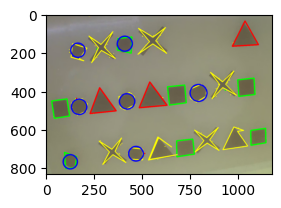

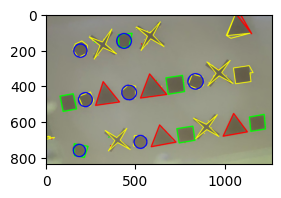

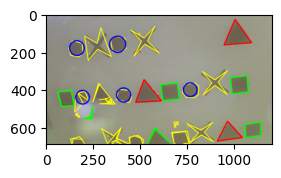

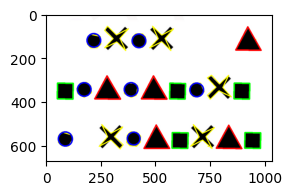

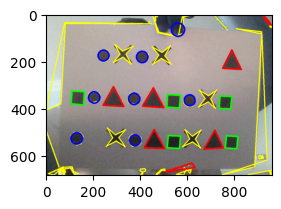

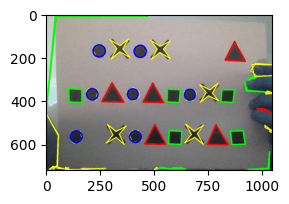

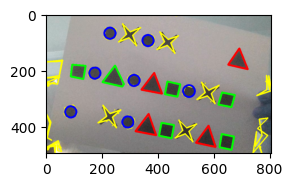

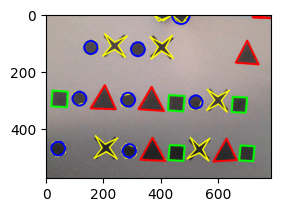

In [9]:
#display the images
for i in range(len(copy)):
    plt.subplot(221)
    plt.imshow(copy[i])
    plt.show()
